<a href="https://colab.research.google.com/github/campeone-pixel/soccer_database/blob/master/ProyectoDS_ParteI_%2BCannoni%2BPoses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Explicación del dataset escogido






El dataset escogido es relacionado al fútbol. Tiene una muy completa información desde el 2014 hasta el 2020.
El mismo se encuentra dividido en 7 partes.
En el dataset "appearences" se hallan estadísticas de cada futbolista en cada aparición en un partido. Tales como goles, disparos, asistencias, posición, tarjeta amarilla, tarjeta roja, cuánto tiempo jugó, si lo sustituyeron.
El dataset "games" refiere a estadísticas relacionadas con los partidos disputados en dicho rango de tiempo. En el mismo se encuentra, como lo más sobresaliente, la temporada, el día y la hora en el que se disputó el encuentro, qué equipos lo hicieron, los goles convertidos por parte de cada uno.
El dataset "leagues" refiere a las 5 ligas más importantes del mundo, de las cuales se obtuvieron la información. Estas son la española, la inglesa, la italiana, la alemana y la francesa.
El dataset "players" es acerca de todos los jugadores que disputaron partidos en dicho periodo de tiempo y en dichas ligas.
El dataset "shots" es sobre los disparos efectuados por los jugadores en los partidos, en qué minuto de juego, en qué situación de juego, con qué parte del cuerpo y el resultado de ese remate, entre otras.
El dataset "teams" se refiere a los equipos que disputaron los partidos en las ligas y periodo mencionados anteriormente.
El dataset "teamstats" es acerca de las estadísticas de cada equipo en cada partido, tales como el año que se disputó, el día y la hora, en qué condición lo hizo, la cantidad de goles que realizó y le concedieron, los disparos, las faltas, los corners, las tarjetas amarillas y rojas.

Teniendo en cuenta toda esta información surgen algunas preguntas, las cuales se van a resolver en este trabajo, como lo son:


*   ¿El equipo local, gana mucho más que el visitante?
*   ¿A medida que avanza el tiempo, es más fácil o más difícil hacer goles? Teniendo en cuenta que se estudia mucho más al rival, su manera de jugar, y se analizan datos estadísticos.


*   ¿Todas las ligas disputan la misma cantidad de partidos, es decir los jugadores sufren igual degaste en todas las ligas?
*   ¿Se mantienen constante los partidos disputados en las ligas durante todo el año?


*   ¿Que liga es la más atractiva para ver fútbol, o sea en cual hay más goles por partido?
*   ¿Los jugadores con más goles, son los más reconocidos mundialmente?








---



##Definicion de objetivo





El objetivo del trabajo es poder predecir resultados de partidos, con el fin de poder ayudar a los cuerpos técnicos de los clubes a obtener más información a la hora de plantear los partidos.

## Contexto comercial

La estadística se está utilizando cada vez más en el ámbito del fútbol. El cuerpo técnico corrobora, en cada partido, los rendimientos que han tenido sus futbolistas particularmente y a los mismos en su conjunto, es decir al equipo. Esto les da una idea de qué aspectos debe corregir para los siguientes compromisos para obtener mejores versiones. 
Con este trabajo se busca que los cuerpos técnicos tengan una nueva herramienta a la hora de planificar sus partidos, con el fin de obtener resultados positivos. Así tendrán una mayor chance de lograr los objetivos deportivos que se propusieron. 

## Problema comercial

Los stakeholders serían los cuerpos técnicos de los distintos clubes. Lo que se les quisiera mostrar serían predicciones de resultados de los partidos para que ellos tomen medidas en base a los mismos y así beneficiar al equipo.

##Contexto analitico

Una casa de apuesta nos contrató debido a que las ganancias que solían tener se están reduciendo con el paso del tiempo. Necesitan volver a la rentabilidad a la cual estaban acostumbrados para mantener su estructura.
Para poder predecir los resultados de los partidos se utilizará un modelo de aprendizaje supervisado, ya que con los datos etiquetados con los que contamos se podrá predecir cómo finalizará. Dentro del mismo, estaría dentro de la categoría de clasificación, ya que el modelo permitirá determinar si el equipo gana, pierde o empata.
Las variables a tener en cuenta para el mismo será:


*   xGoals promedio (Goles esperados)
*   xGoals de los últimos 3 partidos
*   Localía
*   Liga
*   Goles convertidos en el torneo

Para resolver este caso utilizaremos árboles de decisión. Probaremos la eficacia del algoritmo la métrica de precisión (Números de predicciones correctas / Número total de predicciones).





In [534]:

import pandas as pd
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing 


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)

In [535]:

df_games = pd.read_csv("df_game_new.csv")
df_teams = pd.read_csv("df_teams_new.csv")
df_appearances = pd.read_csv("df_appearances_new.csv")
df_players = pd.read_csv("df_players_new.csv")

#df_games = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/df_game_new.csv")
#df_teams = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/df_teams_new.csv")
#df_appearances = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/df_appearances_new.csv")
#df_players = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/df_players_new.csv")

**¿El equipo local, gana mucho más que el visitante?**

<AxesSubplot: ylabel='gameID'>

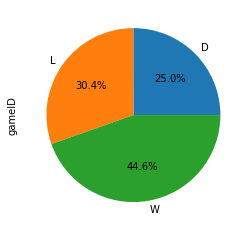

In [536]:
df_games.groupby(['result_home'])['gameID'].count().plot(kind = "pie",autopct='%1.1f%%')

Como era de esperarse el equipo local resulta más victorioso que el visitante, aunque la diferencia es más acotada de lo que podíamos pensar.
L = Derrota del local
D = Empate
W = Victoria del local

**¿A medida que avanza el tiempo, es más fácil o más difícil hacer goles?**

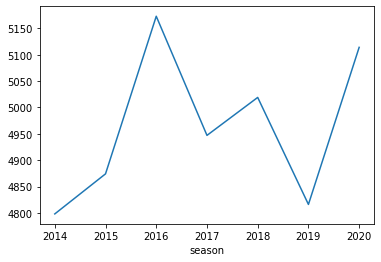

In [537]:
df_games["goal_diff"]= abs(df_games["homeGoals"]  - df_games["awayGoals"])

df_games["diff_labels"]= df_games['goal_diff'].apply(lambda x: str(x) if x<4 else '4 o mas' )
df_games["totalGoals"]= df_games["homeGoals"]  + df_games["awayGoals"]

df_games.groupby(['season'])['totalGoals'].sum().plot()
df_games['month'] = pd.DatetimeIndex(df_games['date']).month

Como puede apreciarse en el gráfico, no existe una relación sobre la hipótesis planteada, ya que si bien parecía que la tendencia después del año 2016 era decreciente hasta el año 2019, en el año 2020 se revirtió y casi igualó la cúspide alcanzada en el año 2016 del rango de tiempo analizado.

**¿Todas las ligas disputan la misma cantidad de partidos, es decir los jugadores sufren igual degaste en todas las ligas?**

<AxesSubplot: xlabel='liga,season'>

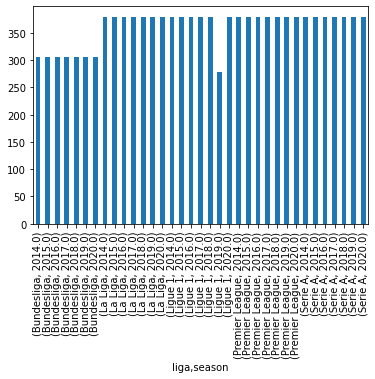

In [538]:
df_games.groupby(['liga','season'])['gameID'].count().plot(kind='bar')

Como conclusión se puede obtener que los jugadores que juegan en la liga alemana (Bundesliga) sufren un menor desgaste que los que disputan las demás ligas, ya que tienen una gran diferencia de partidos jugados por año.

**¿Se mantienen constante los partidos disputados en las ligas durante todo el año?**



Text(0.5, 1.0, 'Ligue 1')

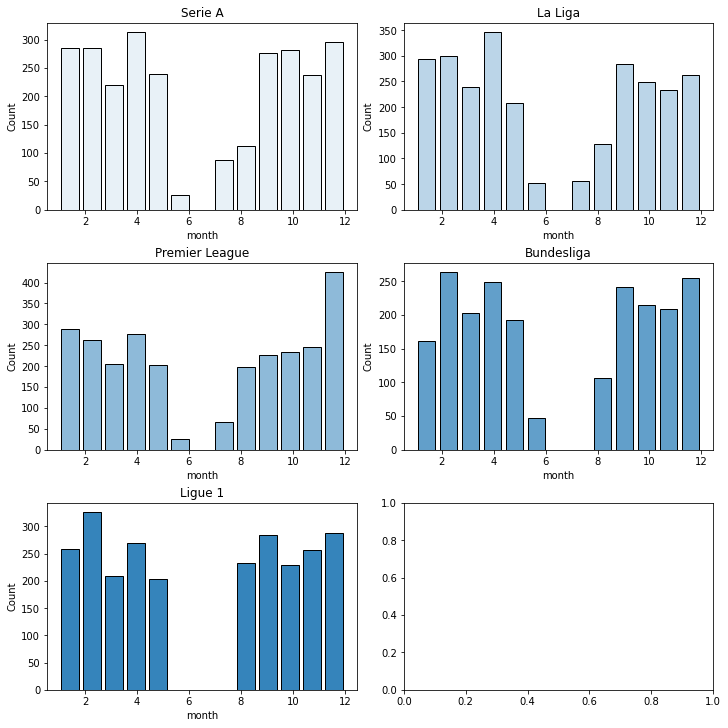

In [539]:
df_f_game_seriea=df_games.loc[df_games['liga']=="Serie A"]
df_f_game_laliga=df_games.loc[df_games['liga']=="La Liga"]
df_f_game_premier=df_games.loc[df_games['liga']=="Premier League"]
df_f_game_bundesliga=df_games.loc[df_games['liga']=="Bundesliga"]
df_f_game_ligue1=df_games.loc[df_games['liga']=="Ligue 1"]

figure, axis = plt.subplots(3, 2, figsize=(10, 10), constrained_layout = True)

sns.histplot(data=df_f_game_seriea, x="month",  shrink=.8, alpha=.1, legend=False,ax=axis[0,0]).set_title("Serie A")
sns.histplot(data=df_f_game_laliga, x="month",  shrink=.8, alpha=.3, legend=False,ax=axis[0,1]).set_title("La Liga")
sns.histplot(data=df_f_game_premier, x="month",  shrink=.8, alpha=.5, legend=False,ax=axis[1,0]).set_title("Premier League")
sns.histplot(data=df_f_game_bundesliga, x="month",  shrink=.8, alpha=.7, legend=False,ax=axis[1,1]).set_title("Bundesliga")
sns.histplot(data=df_f_game_ligue1, x="month",  shrink=.8, alpha=.9, legend=False,ax=axis[2,0]).set_title("Ligue 1")



In [540]:
# data=df_games.loc[:,["gameID","month","liga"]]
# sns.pairplot(data=data, hue="liga")

Se puede comprobar que en promedio hay una cantidad de 250 y 300 partidos por mes. A su vez, se refleja una merma en la cantidad de los mismos entre los meses de junio a agosto, debido al receso existente entre el fin de la temporada y comienzo de la nueva.
Como dato a destacar, se puede visualizar la gran cantidad de partidos que hay en Inglaterra en el mes de diciembre, debido a que existe el Boxing Day, la fecha que se juega siempre en Navidad.

**¿Que liga es la más atractiva para ver fútbol, o sea en cual hay más goles por partido?**

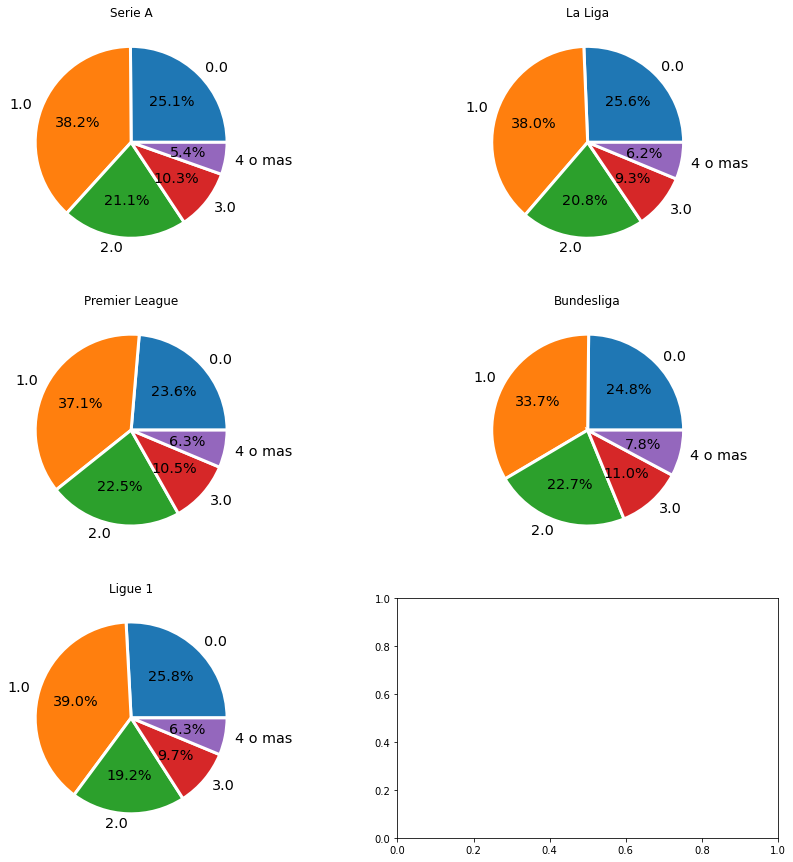

In [541]:

x_seriea=df_f_game_seriea.groupby(['diff_labels'])['gameID']
x_laliga=df_f_game_laliga.groupby(['diff_labels'])['gameID']
x_premier=df_f_game_premier.groupby(['diff_labels'])['gameID']
x_bundesliga=df_f_game_bundesliga.groupby(['diff_labels'])['gameID']
x_ligue1=df_f_game_ligue1.groupby(['diff_labels'])['gameID']




fig, ax = plt.subplots(3, 2, figsize=(15, 15))
autopct='%.1f%%'
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}
textprops={'size': 'x-large'}
ax[0,0].pie(x_seriea.count(),labels= x_seriea.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[0,1].pie(x_laliga.count(),labels= x_laliga.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[1,0].pie(x_premier.count(),labels= x_premier.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[1,1].pie(x_bundesliga.count(),labels= x_bundesliga.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[2,0].pie(x_ligue1.count(),labels= x_ligue1.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[0,0].set_title('Serie A')
ax[0,1].set_title('La Liga')
ax[1,0].set_title('Premier League')
ax[1,1].set_title('Bundesliga')
ax[2,0].set_title('Ligue 1')
plt.show()

Como se puede visualizar en los gráficos, la Bundesliga y la Premier League son las más atractiva, debido a que son las que tienen el porcentaje más alto de varios goles por partido. También son las que tienen el menor porcentaje de 0 goles por partido.

**¿Los jugadores con más goles, son los más reconocidos mundialmente?**

In [542]:


df_p_app= pd.merge(
    df_appearances,
    df_players,
    left_on=["playerID"],
    right_on=["playerID"],
    how="left",
)


df_p_app= pd.merge(
    df_p_app,
    df_games[['gameID','season']],
    on='gameID',
    how="left",
)
df_prob_stats= pd.merge(
    df_p_app[["gameID","goals","playerID","xGoals","xGoalsChain","xGoalsBuildup","xAssists",'season']],
    df_players[['name',"playerID"]],
    left_on=["playerID"],
    right_on=["playerID"],
    how="left",
)

df_prob_stats= df_prob_stats[['gameID','season','name', 'playerID', 'goals', 'xGoals', 'xGoalsChain', 'xGoalsBuildup',
       'xAssists' ]]




<ipython-input-543-35ea06c9a195>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mas_de_100.sort_values(by='goals',inplace=True )


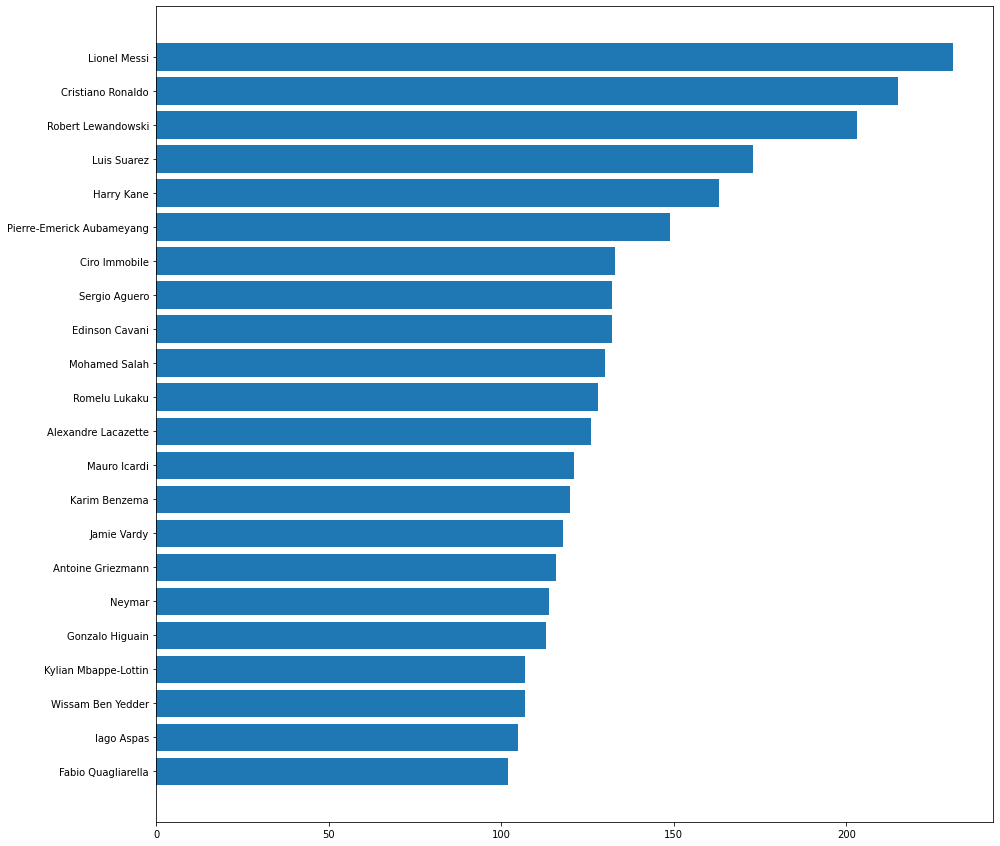

In [543]:
grouped_goal_total=df_prob_stats.groupby(["name"],as_index=False)["goals"].sum()

mas_de_100=grouped_goal_total.loc[grouped_goal_total['goals']>100]
mas_de_100.sort_values(by='goals',inplace=True )

fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(list(mas_de_100["name"])  ,  list(mas_de_100['goals'])  )

df_filtered=df_prob_stats[df_prob_stats['name'].isin(mas_de_100['name'])]
df_filtered=df_filtered.groupby(["name",'season'],as_index=False)["goals"].sum()
df_filtered.sort_values(by=['season',"name"],inplace=True)

Como puede comprobarse en el gráfico precendete, tanto Lionel Messi como Cristiano Ronaldo, las máximas figuras de los últimos años, lideran la tabla de artilleros del periodo analizado, superando los 200 goles a nivel clubes.

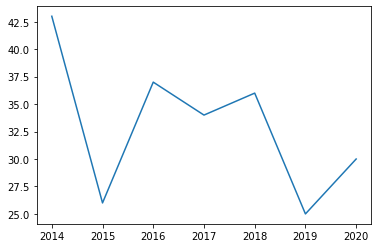

In [544]:
fig1, ax1 = plt.subplots()

ax1.plot(df_filtered[df_filtered['name'].str.contains("Messi")].season,   df_filtered[df_filtered['name'].str.contains("Messi")].goals, label=df_filtered[df_filtered['name'].str.contains("Messi")].name)

En este último gráfico se puede observar como fue variando los goles de Lionel Messi a lo largo del periodo de tiempo en cuestión. Después de una espectacular temporada en el 2014, su rendimiento mermó, lógicamente por una cuestión natural como es la edad.

##Analizamos xGoals

Agrupamos los equipos por localía y tomamos los xGoals en esa condición (local o visitante).

In [545]:
prom_home_xgoal=df_games.groupby(['homeTeamID'],as_index=False)
prom_away_xgoal=df_games.groupby(['awayTeamID'],as_index=False)
prom_home_xgoal=prom_home_xgoal['xGoals_home'].mean().sort_values(by="xGoals_home",ascending=False)
prom_away_xgoal=prom_away_xgoal['xGoals_away'].mean().sort_values(by="xGoals_away",ascending=False)

#se mergea con el dataset principal

df_games=pd.merge(df_games,prom_home_xgoal,   
    
    
    left_on="homeTeamID",
    right_on="homeTeamID",
    suffixes=("", "_prom")
  )


df_games=pd.merge(df_games,prom_away_xgoal,   
    
    
    left_on="awayTeamID",
    right_on="awayTeamID",
    suffixes=("", "_prom")
  )
df_games


df_games["xgoal_diff"]= df_games["xGoals_home_prom"]  - df_games["xGoals_away_prom"]








<AxesSubplot: xlabel='result_home', ylabel='xgoal_diff'>

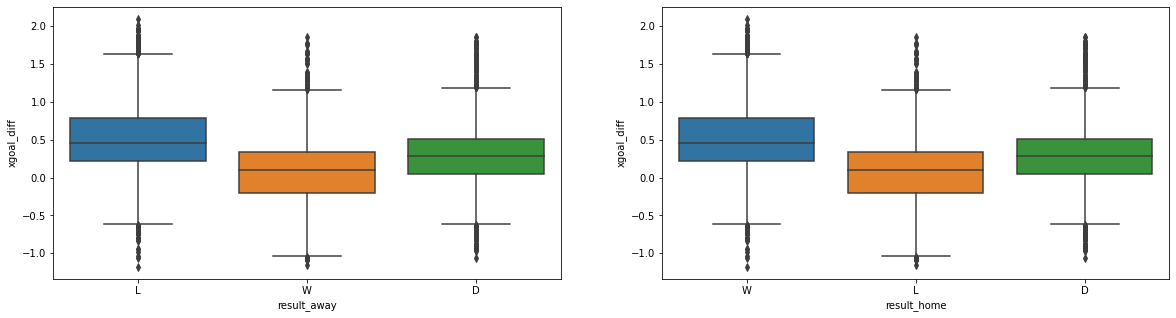

In [546]:

figbi, axesbi = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x=df_games.result_away, y=df_games.xgoal_diff, data=df_games,ax=axesbi[0])
sns.boxplot(x=df_games.result_home, y=df_games.xgoal_diff, data=df_games,ax=axesbi[1])




En el gráfico que precede se puede observar cómo cambia el resultado según la condición de localía. Si se juega de visitante, se necesita una mayor diferencia de xGoals para ganar que si se juega de local.
También se observan varios outliers que en el siguiente paso los vamos a eliminar.

<AxesSubplot: xlabel='xGoals_home_prom', ylabel='xGoals_away_prom'>

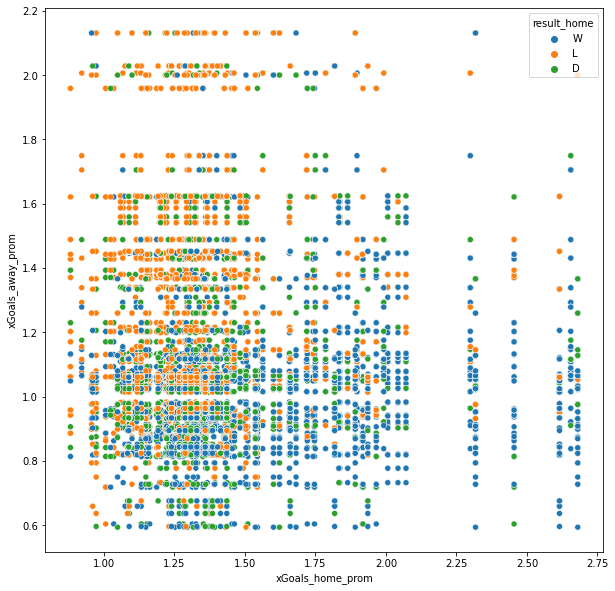

In [547]:
figbi, axesbi = plt.subplots( figsize=(10, 10))
sns.scatterplot(x=df_games.xGoals_home_prom, y=df_games.xGoals_away_prom, hue=df_games.result_home)


Se puede concluir que a mayor xGoals, hay más chances que el equipo gane el partido.
Es interesante notar que el equipo local tiene menos probabilidades de perder cuando su rival le lleva una mayor diferencia de xGoals.

In [548]:
indexwin = df_games[ (df_games['result_home'] == "W") & ((df_games['xgoal_diff'] > 1.4) | (df_games['xgoal_diff'] < -0.5 ) )].index
indexlost = df_games[ (df_games['result_home'] == "L") & ((df_games['xgoal_diff'] > 0.9) | (df_games['xgoal_diff'] < -0.9 )) ].index
indextie = df_games[ (df_games['result_home'] == "D") & ((df_games['xgoal_diff'] > 1) | (df_games['xgoal_diff'] < -0.5 ))].index


df_games.drop(indexwin , inplace=True)
df_games.drop(indexlost , inplace=True)
df_games.drop(indextie , inplace=True)

<AxesSubplot: xlabel='xGoals_home_prom', ylabel='xGoals_away_prom'>

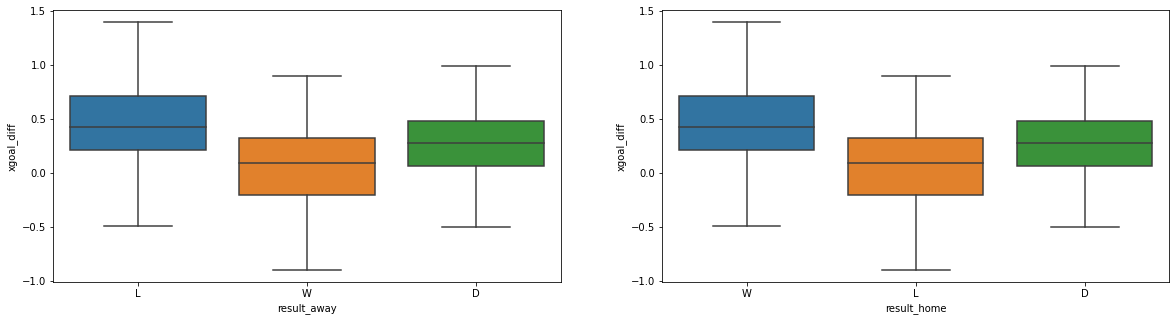

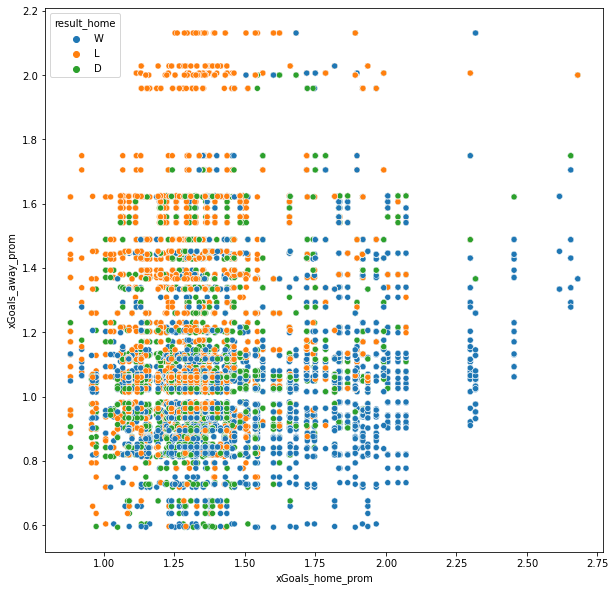

In [549]:



figbi, axesbi = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x=df_games.result_away, y=df_games.xgoal_diff, data=df_games,ax=axesbi[0])
sns.boxplot(x=df_games.result_home, y=df_games.xgoal_diff, data=df_games,ax=axesbi[1])
figbi, axesbi = plt.subplots( figsize=(10, 10))

sns.scatterplot(x=df_games.xGoals_home_prom, y=df_games.xGoals_away_prom, hue=df_games.result_home)

In [550]:
df_games_df_teams=pd.merge(df_games,df_teams,left_on='homeTeamID',right_on='teamID')
df_games_df_teams=pd.merge(df_games_df_teams,df_teams,left_on='awayTeamID',right_on='teamID',suffixes=('_home','_away'))

In [551]:
from sklearn.tree import DecisionTreeClassifier  #arbol de decision
from sklearn import tree #arbol de decision

##Árbol de decisión

Se optó por utilizar un árbol de decisión como algoritmo de clasificación para entrenar el modelo con los datos elegidos.
Antes de utilizarlo, se decidió asignarle un 1 a las victorias y un 0 a cualquier otro tipo de resultados (empates y derrotas).

In [552]:


def whowin(x):
  if x=='W':
    return 1
 
  else:
    return 0
df_games_df_teams.columns

Index(['gameID', 'leagueID', 'season', 'date', 'homeTeamID', 'awayTeamID',
       'homeGoals', 'awayGoals', 'homeProbability', 'drawProbability',
       'awayProbability', 'homeGoalsHalfTime', 'awayGoalsHalfTime', 'B365H',
       'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH',
       'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD',
       'PSCA', 'xGoals_home', 'shots_home', 'shotsOnTarget_home', 'deep_home',
       'ppda_home', 'fouls_home', 'corners_home', 'yellowCards_home',
       'redCards_home', 'result_home', 'xGoals_away', 'shots_away',
       'shotsOnTarget_away', 'deep_away', 'ppda_away', 'fouls_away',
       'corners_away', 'yellowCards_away', 'redCards_away', 'result_away',
       'liga', 'home_name', 'away_name', 'match_name', 'goal_diff',
       'diff_labels', 'totalGoals', 'month', 'xGoals_home_prom',
       'xGoals_away_prom', 'xgoal_diff', 'teamID_home', 'name_home',
       'club_id_home', 'pretty_name_home', 'domestic_competit

**Método para escalar**

Standard Scaler

Se escaló utilizando el método de standard scaler  en todas las columnas salvo en season.

In [553]:
df_games_df_teams_col=df_games_df_teams[['season','xgoal_diff','B365H',
       'B365D', 'B365A']]


In [554]:
from sklearn.preprocessing import StandardScaler
df_games_df_teams_sum_season=df_games_df_teams_col[['season']]
df_games_df_teams_col_no_season=df_games_df_teams_col[['xgoal_diff','B365H',
       'B365D', 'B365A']]
datos_escalados=StandardScaler().fit_transform(df_games_df_teams_col_no_season[['xgoal_diff','B365H',
       'B365D', 'B365A']])

In [555]:
df1_scaled=pd.DataFrame(datos_escalados,columns=['xgoal_diff','B365H',
       'B365D', 'B365A'],index=df_games_df_teams_col_no_season.index)

df_games_df_teams_sum=pd.concat([df_games_df_teams_sum_season,df1_scaled], axis=1)


df_games_df_teams_sum['all_result']=df_games_df_teams['result_home'].apply(lambda x: whowin(x))


In [556]:
df_games_df_teams_sum.dropna(inplace=True)

In [557]:
df_games_df_teams_sum.loc[df_games_df_teams_sum.isna().any(axis=1)]

,season,xgoal_diff,B365H,B365D,B365A,all_result


In [558]:
df_games_df_teams_sum

,season,xgoal_diff,B365H,B365D,B365A,all_result
0,2015.0,0.016351,-0.589871,0.113606,0.549916,1
1,2016.0,0.016351,-0.307665,-0.467734,-0.213011,1
2,2014.0,0.016351,-0.456464,-0.128619,0.019046,1
3,2017.0,0.016351,-0.338451,-0.477423,-0.152612,1
4,2018.0,0.016351,-0.092162,-0.564624,-0.435531,0
...,...,...,...,...,...,...
11886,2016.0,-0.571013,-0.102424,-0.758404,-0.435531,0
11887,2014.0,-0.965819,0.231092,-0.758404,-0.594474,0
11888,2017.0,-0.646694,-0.051114,-0.758404,-0.499108,1
11889,2018.0,-0.646694,0.308057,-0.758404,-0.626263,0


Se utilizó un training set con los datos menores obtenidos al año 2017 inclusive. El test set se realizó con los años posteriores a dicho año.

In [559]:
test=df_games_df_teams_sum.loc[df_games_df_teams_sum["season"]>2018]
train=df_games_df_teams_sum.loc[df_games_df_teams_sum["season"]<=2017]
train = train.drop('season',axis= 1)
test = test.drop('season',axis= 1)


y_train = train['all_result']
x_train = train.drop('all_result',axis= 1)

y_test = test['all_result']
x_test = test.drop('all_result',axis= 1)



In [560]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)
rf.fit(x_train,y_train)
predictions=rf.predict(x_test)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,predictions)
acc 

0.64453125

In [561]:
train

,xgoal_diff,B365H,B365D,B365A,all_result
0,0.016351,-0.589871,0.113606,0.549916,1
1,0.016351,-0.307665,-0.467734,-0.213011,1
2,0.016351,-0.456464,-0.128619,0.019046,1
3,0.016351,-0.338451,-0.477423,-0.152612,1
7,-1.001965,0.308057,-0.370844,-0.642157,0
...,...,...,...,...,...
11881,-0.642645,0.102817,-0.758404,-0.546791,0
11882,-0.642645,-0.282010,-0.661514,-0.279767,1
11886,-0.571013,-0.102424,-0.758404,-0.435531,0
11887,-0.965819,0.231092,-0.758404,-0.594474,0


In [562]:
# ajustar arbol de decisión simple con hiperparametros (defecto)
clf = DecisionTreeClassifier(random_state=435)

clf.fit(x_train, y_train ) 
preds = clf.predict(x_test) 

In [563]:
''' # Graficando
fig = plt.figure(figsize=(18,10))
tree.plot_tree(clf,
               feature_names=x_train.columns)

plt.show() '''

' # Graficando\nfig = plt.figure(figsize=(18,10))\ntree.plot_tree(clf,\n               feature_names=x_train.columns)\n\nplt.show() '

In [564]:


y_pred = clf.predict(x_test)

y_pred

array([0, 1, 0, ..., 0, 1, 1])

##Métricas

**Accuracy**

In [565]:
def accuracy_manual(y_test,y_pred):
  posicion=0
  valores_iguales=0

  while posicion<len(y_test):
    if y_test[posicion]==y_pred[posicion]:
      valores_iguales+=1
    posicion+=1

  return valores_iguales

numero_predicciones_correctas=accuracy_manual(y_test.values, y_pred)

numero_total_predicciones=len(y_test)

accuracy_score_arbol= numero_predicciones_correctas/numero_total_predicciones

print("Accuracy:",accuracy_score_arbol)

Accuracy: 0.5886418269230769


Se utilizó la métrica del accuracy para demostrar la eficiencia del método. El mismo es de un 0.64, es decir que las predicciones efectuadas sobre si un equipo gana o no tiene una precisión de un 64%, o sea en la mayor cantidad de los casos acierta.

In [566]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics


<Figure size 720x432 with 0 Axes>

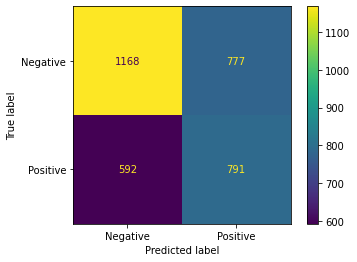

In [567]:
sklearn.metrics.SCORERS.keys() 
plt.figure(figsize=(10,6))
ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, display_labels=['Negative', 'Positive'])

**Precision**

In [568]:
precision = metrics.precision_score(y_test, preds)
precision

0.5044642857142857

**Recall**

In [569]:
recall = metrics.recall_score(y_test, preds)
recall

0.571945046999277

Con la métrica precisión se busca minimizar los falsos positivos y con recall se busca minimizar los falsos negativos. Ambos valores son muy similares, como puede visualizarse.

**F1**

In [570]:
f1_score = metrics.f1_score(y_test, preds)
f1_score 

0.5360894611995933

Como era de esperarse al no ser valores muy altos de precisión y de recall, el F1 tampoco lo será, ya que su cálculo depende de los parámetros mencionados.

In [571]:
preds_train = clf.predict(x_train) 

**Underfitting u Overfitting**

In [572]:
train_accuracy = metrics.accuracy_score(y_train, preds_train)
train_accuracy 

0.9960508995173322

In [573]:
preds_test = clf.predict(x_test) 

test_accuracy = metrics.accuracy_score(y_test, preds_test)
test_accuracy 

0.5886418269230769

Al evaluar si encuadra dentro de un modelo underfitting-overfitting, se puede concluir que está dentro de esta última categoría, debido a que con los datos del entrenamiento se obtiene una precisión del 100%, pero cuando se tiene en cuenta los datos del test, la misma baja a un 64%, esto da una idea que el modelo se adapta mucho a los datos existentes y no así a los datos nuevos.
Para aumentar esta precisión, quizás habría que probar con más modelos o realizar un future engineering más exhaustivo


In [574]:
df_roll=df_games_df_teams[['date','gameID','season','homeTeamID','awayTeamID' ,'xgoal_diff','xGoals_home', 'shots_home', 'shotsOnTarget_home', 'deep_home',
       'ppda_home',  'corners_home',
       'xGoals_away', 'shots_away',
       'shotsOnTarget_away', 'deep_away', 'ppda_away',
       'corners_away','result_home']]

df_roll['result']=df_roll['result_home'].apply(lambda x: whowin(x))
df_roll.drop(columns='result_home',axis=1,inplace=True)


<ipython-input-574-6a4ee0e0fdc4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_roll['result']=df_roll['result_home'].apply(lambda x: whowin(x))
<ipython-input-574-6a4ee0e0fdc4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_roll.drop(columns='result_home',axis=1,inplace=True)


In [575]:
def rolling_averages(group,cols,new_cols):
    group=group.sort_values('date')
    rolling_stats=group[cols].rolling(3,closed='left').mean()
    group[new_cols]=rolling_stats
    group=group.dropna(subset=new_cols)
    return group

In [576]:
cols_home=['xGoals_home', 'shots_home', 'shotsOnTarget_home', 'deep_home',
       'ppda_home',  'corners_home']
new_cols_home=[f'{c}_rolling' for c in cols_home]


In [577]:
cols_away=['xGoals_away', 'shots_away',
       'shotsOnTarget_away', 'deep_away', 'ppda_away',
       'corners_away']
new_cols_away=[f'{c}_rolling' for c in cols_away]

In [578]:
home_grouped_matches=df_roll.groupby('homeTeamID').apply(lambda x: rolling_averages(x,cols_home,new_cols_home) )
away_grouped_matches=df_roll.groupby('awayTeamID').apply(lambda x: rolling_averages(x,cols_away,new_cols_away) )

In [579]:
home_grouped_matches=home_grouped_matches.droplevel('homeTeamID')
away_grouped_matches=away_grouped_matches.droplevel('awayTeamID')

In [580]:
home_rolling=home_grouped_matches[['gameID','xGoals_home_rolling', 'shots_home_rolling',
       'shotsOnTarget_home_rolling', 'deep_home_rolling', 'ppda_home_rolling',
       'corners_home_rolling']]

away_rolling=away_grouped_matches[['gameID','xGoals_away_rolling', 'shots_away_rolling',
       'shotsOnTarget_away_rolling', 'deep_away_rolling', 'ppda_away_rolling',
       'corners_away_rolling']]

home_away=pd.merge(home_rolling,away_rolling)
df_roll=pd.merge(df_roll,home_away)


In [581]:
df_roll.columns

Index(['date', 'gameID', 'season', 'homeTeamID', 'awayTeamID', 'xgoal_diff',
       'xGoals_home', 'shots_home', 'shotsOnTarget_home', 'deep_home',
       'ppda_home', 'corners_home', 'xGoals_away', 'shots_away',
       'shotsOnTarget_away', 'deep_away', 'ppda_away', 'corners_away',
       'result', 'xGoals_home_rolling', 'shots_home_rolling',
       'shotsOnTarget_home_rolling', 'deep_home_rolling', 'ppda_home_rolling',
       'corners_home_rolling', 'xGoals_away_rolling', 'shots_away_rolling',
       'shotsOnTarget_away_rolling', 'deep_away_rolling', 'ppda_away_rolling',
       'corners_away_rolling'],
      dtype='object')

In [582]:
df_roll=df_roll[['season', 'xgoal_diff',
       'xGoals_home', 'shots_home', 'shotsOnTarget_home', 'deep_home',
       'ppda_home', 'corners_home', 'xGoals_away', 'shots_away',
       'shotsOnTarget_away', 'deep_away', 'ppda_away', 'corners_away',
       'xGoals_home_rolling', 'shots_home_rolling',
       'shotsOnTarget_home_rolling', 'deep_home_rolling', 'ppda_home_rolling',
       'corners_home_rolling', 'xGoals_away_rolling', 'shots_away_rolling',
       'shotsOnTarget_away_rolling', 'deep_away_rolling', 'ppda_away_rolling',
       'corners_away_rolling','result']]



In [583]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

test_roll=df_roll.loc[df_roll["season"]>2018]
train_roll=df_roll.loc[df_roll["season"]<=2017]
y_train_roll = train_roll['result']
x_train_roll = train_roll.drop('result',axis= 1)

y_test_roll = test_roll['result']
x_test_roll = test_roll.drop('result',axis= 1)

rf_roll=RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)
rf_roll.fit(x_train_roll,y_train_roll)
predictions=rf_roll.predict(x_test_roll)
    
acc=accuracy_score(y_test_roll,predictions)
acc 

0.776520941608071

In [584]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(solver='lbfgs', max_iter=2000)
logreg.fit(x_train_roll, y_train_roll)

LogisticRegression(max_iter=2000)

In [585]:
y_pred_roll = logreg.predict(x_test_roll)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test_roll, y_test_roll)))

Accuracy of logistic regression classifier on test set: 0.80


In [586]:
from sklearn.metrics import classification_report
print(classification_report(y_test_roll, y_pred_roll))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1905
           1       0.76      0.76      0.76      1366

    accuracy                           0.80      3271
   macro avg       0.79      0.79      0.79      3271
weighted avg       0.80      0.80      0.80      3271

